In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
from datetime import datetime
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, inspect

In [6]:
import pymysql

In [7]:
pymysql.install_as_MySQLdb()

In [8]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [9]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [10]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [11]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [14]:
first_msr = session.query(Measurement).first()
first_msr.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x11b8eb2e8>,
 'tobs': 65.0,
 'date': '2010-01-01',
 'prcp': 0.08,
 'station': 'USC00519397',
 'id': 1}

In [15]:
first_st = session.query(Station).first()
first_st.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x11b8f4358>,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397'}

In [16]:
import datetime as dt

In [17]:
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date[0]


'2017-08-23'

In [19]:
last_year= dt.datetime.strptime(last_date[0],"%Y-%m-%d")
last_year
last_year = last_year - dt.timedelta(days=365)
print(last_year)
  

2016-08-23 00:00:00


In [74]:
prcp_data = session.query(Measurement.date, Measurement.prcp).order_by(Measurement.date.desc()).filter(Measurement.date >= last_year).all()
prcp_data


[('2017-08-23', 0.0),
 ('2017-08-23', 0.0),
 ('2017-08-23', 0.08),
 ('2017-08-23', 0.45),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.5),
 ('2017-08-21', 0.0),
 ('2017-08-21', 0.02),
 ('2017-08-21', None),
 ('2017-08-21', 0.56),
 ('2017-08-20', 0.0),
 ('2017-08-20', 0.01),
 ('2017-08-20', None),
 ('2017-08-19', 0.0),
 ('2017-08-19', 0.0),
 ('2017-08-19', None),
 ('2017-08-19', 0.09),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.06),
 ('2017-08-18', None),
 ('2017-08-17', 0.0),
 ('2017-08-17', 0.05),
 ('2017-08-17', 0.01),
 ('2017-08-17', 0.13),
 ('2017-08-16', 0.0),
 ('2017-08-16', 0.07),
 ('2017-08-16', 0.12),
 ('2017-08-16', 0.42),
 ('2017-08-15', 0.02),
 ('2017-08-15', 0.0),
 ('2017-08-15', 0.06),
 ('2017-08-15', 0.32),
 ('2017-08-15', 0.42),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.01),
 ('2017-08-14', 0.08),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.22),
 ('2017-08-13', 0.0),
 ('2017-08-13', None),
 ('2017-08-13', 0.0),
 ('2017-08-13', 0.0),
 ('2017

In [47]:
labels = ['Dates', 'Precipitation']
prcp_df = pd.DataFrame.from_records(prcp_data, columns=labels)

In [75]:
prcp_describe=prcp_df.describe()
prcp_describe

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [49]:
prcp_describe.to_csv('prcp_describe.csv', index = True, header = False, mode='a')

In [50]:
prcp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 2 columns):
Dates            2230 non-null object
Precipitation    2021 non-null float64
dtypes: float64(1), object(1)
memory usage: 34.9+ KB


In [51]:
prcp_df.set_index('Dates').head()

,Precipitation
Dates,
2017-08-23,0.00
2017-08-23,0.00
2017-08-23,0.08
2017-08-23,0.45
2017-08-22,0.00


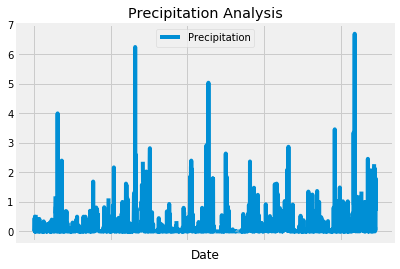

In [52]:
prcp_df.plot('Dates','Precipitation')
plt.xlabel("Date")
plt.title("Precipitation Analysis")
lgnd=plt.legend(["Precipitation"],loc="upper center")
plt.xticks(rotation=45)
plt.show()

![precipitation](Images/precipitation.png)

In [53]:
# Use Pandas to calcualte the summary statistics for the precipitation data

![describe](Images/describe.png)

In [54]:
# Design a query to show how many stations are available in this dataset?
count_stations = session.query(Measurement).group_by(Measurement.station).count()
print("There are {} stations.".format(count_stations))

There are 9 stations.


In [55]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
busy_station = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).\
               order_by(func.count(Measurement.tobs).desc()).all()

most_active = busy_station[0][0]    
print(f"Most active Station was {most_active} with {busy_station[0][1]} rain observations.\n")
print(f"Here are all of the Stations (in descending order) with their ranking number and count of rain observations:\n")
Count=0
for station, count in busy_station:
    Count+=1
    print(f"Ranking {Count} Station #{station} with {count} rain observations.")

Most active Station was USC00519281 with 2772 rain observations.

Here are all of the Stations (in descending order) with their ranking number and count of rain observations:

Ranking 1 Station #USC00519281 with 2772 rain observations.
Ranking 2 Station #USC00519397 with 2724 rain observations.
Ranking 3 Station #USC00513117 with 2709 rain observations.
Ranking 4 Station #USC00519523 with 2669 rain observations.
Ranking 5 Station #USC00516128 with 2612 rain observations.
Ranking 6 Station #USC00514830 with 2202 rain observations.
Ranking 7 Station #USC00511918 with 1979 rain observations.
Ranking 8 Station #USC00517948 with 1372 rain observations.
Ranking 9 Station #USC00518838 with 511 rain observations.


In [56]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
data = [Measurement.station, 
       func.min(Measurement.tobs), 
       func.max(Measurement.tobs), 
       func.avg(Measurement.tobs)]
temperature = session.query(*data).\
    filter(Measurement.station == most_active).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.tobs).desc()).all()

labels = ['Station', 'Min_temp', 'Max_temp', 'Average_temp']
Active_station = pd.DataFrame.from_records(temperature, columns=labels)
Active_station

,Station,Min_temp,Max_temp,Average_temp
0,USC00519281,54.0,85.0,71.663781


In [57]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_data = session.query(Measurement.date,Measurement.tobs).\
    filter(Measurement.date > last_year).\
    filter(Measurement.station == most_active).\
    order_by(Measurement.date).all()

labels = ['Dates', 'Temperature']
ActStation_temp = pd.DataFrame.from_records(temp_data, columns=labels)
ActStation_temp

,Dates,Temperature
0,2016-08-24,77.0
1,2016-08-25,80.0
2,2016-08-26,80.0
3,2016-08-27,75.0
4,2016-08-28,73.0
5,2016-08-29,78.0
6,2016-08-30,77.0
7,2016-08-31,78.0
8,2016-09-01,80.0
9,2016-09-02,80.0


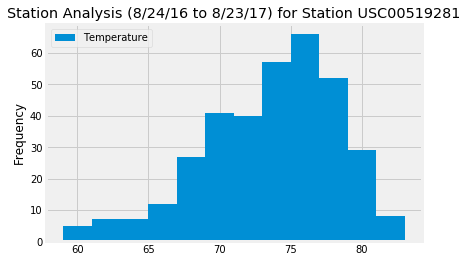

In [58]:
plt.hist(ActStation_temp['Temperature'],12)
plt.ylabel("Frequency")
plt.title(f"Station Analysis (8/24/16 to 8/23/17) for Station {most_active}")
lgnd=plt.legend(['Temperature'],loc="upper left")
plt.show()

![precipitation](Images/station-histogram.png)

In [59]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates

def temps_days(start_date, end_date):

    trip = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
                    filter(Measurement.date >= start_date).\
                    filter(Measurement.date <= end_date).all()
    return trip
    temp_days('2012-02-28', '2012-03-05')
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(temps_days('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [60]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
arrive_date = dt.date(2012, 2, 28)
leave_date = dt.date(2012, 3, 5)
prv_year = dt.timedelta(days=365)
temp_prv_year = (temps_days((arrive_date-prv_year), (leave_date-prv_year)))
print(temp_prv_year)

[(61.0, 70.08928571428571, 75.0)]


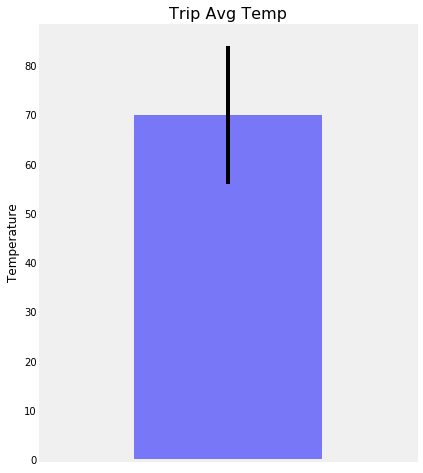

In [61]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
trip_df = pd.DataFrame(temp_prv_year, columns=['Min_Temp', 'Avg_Temp', 'Max_Temp'])
avg_temp = trip_df['Avg_Temp']
min_max_temp = trip_df.iloc[0]['Max_Temp'] - trip_df.iloc[0]['Min_Temp']
avg_temp.plot(kind='bar', yerr=min_max_temp, figsize=(6,8), alpha=0.5, color='blue')
plt.title("Trip Avg Temp", fontsize=16)
plt.ylabel("Temperature")
plt.xticks([])
plt.grid()
plt.show()

In [62]:
trip_df

,Min_Temp,Avg_Temp,Max_Temp
0,61.0,70.089286,75.0


In [72]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

rain_fall = session.query(Station.station,
                  func.sum(Measurement.prcp),
                  Station.name,
                  Station.elevation,                                    
                  Station.latitude,
                  Station.longitude)\
.filter(Measurement.station == Station.station)\
.filter(Measurement.date >= (arrive_date-prv_year))\
.filter(Measurement.date <= (leave_date-prv_year))\
.group_by(Station.station)\
.order_by(func.sum(Measurement.prcp).desc())

Count=0
for record in rain_fall:
    Count+=1
    print(f"{Count}\n Location {record[2]} with rainfall of {record[1]}\n Elevation:  {record[3]} \n Latitude:  {record[4]}  \n Longitude: {record[5]}")

1
 Location WAIHEE 837.5, HI US with rainfall of 3.74
 Elevation:  32.9 
 Latitude:  21.45167  
 Longitude: -157.84888999999998
2
 Location KUALOA RANCH HEADQUARTERS 886.9, HI US with rainfall of 2.6
 Elevation:  7.0 
 Latitude:  21.5213  
 Longitude: -157.8374
3
 Location KANEOHE 838.1, HI US with rainfall of 2.5999999999999996
 Elevation:  14.6 
 Latitude:  21.4234  
 Longitude: -157.8015
4
 Location WAIMANALO EXPERIMENTAL FARM, HI US with rainfall of 2.46
 Elevation:  19.5 
 Latitude:  21.33556  
 Longitude: -157.71139
5
 Location UPPER WAHIAWA 874.3, HI US with rainfall of 2.33
 Elevation:  306.6 
 Latitude:  21.4992  
 Longitude: -158.0111
6
 Location MANOA LYON ARBO 785.2, HI US with rainfall of 1.69
 Elevation:  152.4 
 Latitude:  21.3331  
 Longitude: -157.8025
7
 Location WAIKIKI 717.2, HI US with rainfall of 1.41
 Elevation:  3.0 
 Latitude:  21.2716  
 Longitude: -157.8168
8
 Location HONOLULU OBSERVATORY 702.2, HI US with rainfall of 0.63
 Elevation:  0.9 
 Latitude:  21.31

## Optional Challenge Assignment

In [71]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [65]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
# Set the start and end date of the trip

start_date = dt.date(2012, 2, 28)
end_date = dt.date(2012, 3, 5)

# Use the start and end date to create a range of dates
# Stip off the year and save a list of %m-%d strings

dates = session.query(Measurement.date).filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).group_by(Measurement.date).all()
dates_list = [x[0] for x in dates]
dates_mday= [x[5:] for x in dates_list]

start_mday = dates_mday[0]
end_mday = dates_mday[-1]

daily_normals = [session.query(func.min(Measurement.tobs),func.avg(Measurement.tobs), func.max(Measurement.tobs)).filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).group_by(Measurement.date).all()]
    
# Loop through the list of %m-%d strings and calculate the normals for each date    
daily_normals = [session.query(func.min(Measurement.tobs,Measurement.date),
                       func.avg(Measurement.tobs),
                       func.max(Measurement.tobs)).filter(func.strftime("%m-%d", Measurement.date) >= start_mday).filter(func.strftime("%m-%d", Measurement.date) <= end_mday).group_by(func.strftime("%m-%d", Measurement.date)).all()]

daily_normals = daily_normals[0]
print("Daily Normals for 02-28 to 03-05")
daily_normals

Daily Normals for 02-28 to 03-05


[(80.0, 70.65517241379311, 80.0),
 (79.0, 71.73333333333333, 79.0),
 (76.0, 70.0327868852459, 76.0),
 (78.0, 70.36666666666666, 78.0),
 (78.0, 70.06896551724138, 78.0),
 (77.0, 69.27272727272727, 77.0),
 (76.0, 67.89090909090909, 76.0)]

In [66]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
daily_normals_df= pd.DataFrame(daily_normals,columns=['tmin', 'tavg', 'tmax'])
daily_normals_df['date']= dates_list
daily_normals_df.set_index('date',inplace=True)
daily_normals_df

,tmin,tavg,tmax
date,,,
2012-02-28,80.0,70.655172,80.0
2012-02-29,79.0,71.733333,79.0
2012-03-01,76.0,70.032787,76.0
2012-03-02,78.0,70.366667,78.0
2012-03-03,78.0,70.068966,78.0
2012-03-04,77.0,69.272727,77.0
2012-03-05,76.0,67.890909,76.0


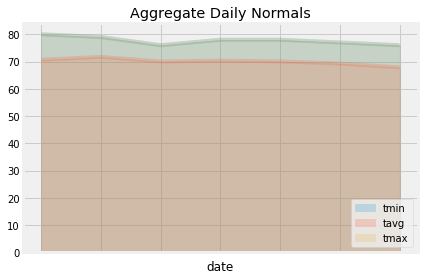

In [70]:
# Plot the daily normals as an area plot with `stacked=False`
daily_normals_df.plot(kind='area', alpha=.2, stacked=False, x_compat=True, title="Aggregate Daily Normals")
plt.tight_layout()
lgnd_plot=plt.legend(loc="lower right")
plt.show()